# Priming and Resonance

In [1]:
%load_ext autoreload
from ExemPy import *
from ExemPy.utils import *
from ExemPy.viz import *
from ExemPy.GCM import *
%aimport ExemPy, ExemPy.utils, ExemPy.viz, ExemPy.GCM
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

In [2]:
# Read in data
pb52 = pd.read_csv('pb52_data//pb52.csv')
pb52 = HzToBark(pb52,["F0", "F1", "F2", "F3"])

In [3]:
# Set parameters
w1 = {'z0' : 0.10, 'z1' : 0.37, 'z2' : 0.23, 'z3' : 0.29}
w2 = {'z0' : 0.17, 'z1' : 0.46, 'z2' : 0.22, 'z3' : 0.15}
w3 = {'z0' : 0.27, 'z1' : 0.16, 'z2' : 0.15, 'z3' : 0.25}
w4 = {'z0' : 0.14, 'z1' : 0.35, 'z2' : 0.26, 'z3' : 0.21}
w5 = {'z0' : 1, 'z1' : .761, 'z2' : .681, 'z3' : .407}

wlist = [w1, w2, w3, w4, w5]


dimsvals = w1
dimslist = list(dimsvals.keys())
catslist = ['type', 'vowel'] 
cval = 25

exemplars = pb52
test = pb52

In [4]:
thestim = pb52.loc[(pb52['speaker']==47) & (pb52['vowel']=='FOOT') & (pb52['repetition']==2)]

In [5]:
print(thestim)

    type gender  speaker vowel  repetition   F0   F1    F2    F3        z0  \
935    w      f       47  FOOT           2  205  570  1200  2970  2.008591   

           z1        z2         z3  
935  5.510198  9.651013  15.621258  


In [6]:
# Get probabilities in normal categorization task
prlist = []
choicelist = []
for w in wlist:
    exemplars = exclude(exemplars, thestim,
                        exclude_self = True,
                        alsoexclude='speaker')
    exemplars = reset_N(exemplars, N = 1)
    bigdf = activation(thestim, exemplars,
                       dimsdict = w, c = cval)
    pr = probs(bigdf, catslist)
    pr['vowel']=np.round(pr['vowel'],3)
    prlist.append(pr)
    choices = choose(pr, thestim, catslist)
    choicelist.append(choices)

In [7]:
prlist

[{'type':   type  probability
  0    c     0.582884
  1    m     0.085716
  2    w     0.331400,
  'vowel':      vowel  probability
  0    DRESS        0.000
  1   FLEECE        0.000
  2     FOOT        0.419
  3    GOOSE        0.033
  4      KIT        0.000
  5    NURSE        0.000
  6     PALM        0.023
  7    STRUT        0.134
  8  THOUGHT        0.390
  9     TRAP        0.000},
 {'type':   type  probability
  0    c     0.300413
  1    m     0.252053
  2    w     0.447534,
  'vowel':      vowel  probability
  0    DRESS        0.000
  1   FLEECE        0.000
  2     FOOT        0.271
  3    GOOSE        0.058
  4      KIT        0.000
  5    NURSE        0.000
  6     PALM        0.141
  7    STRUT        0.266
  8  THOUGHT        0.264
  9     TRAP        0.000},
 {'type':   type  probability
  0    c     0.199046
  1    m     0.010684
  2    w     0.790270,
  'vowel':      vowel  probability
  0    DRESS        0.000
  1   FLEECE        0.000
  2     FOOT        0.368
  

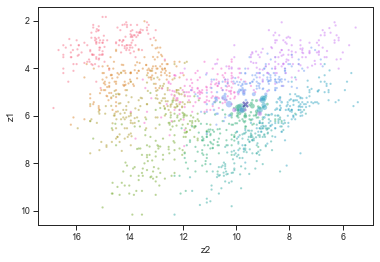

In [8]:
# Get activation plot for normal categoriztaion
exemplars = exclude(exemplars, thestim,
                    exclude_self = True,
                    alsoexclude='speaker')
exemplars = reset_N(exemplars, N = 1)
bigdf = activation(thestim, exemplars,
                   dimsdict = w2, c = cval)
a = getactiv(activxn = bigdf,
             x='z2', y = 'z1',
             cat='vowel')
pl = activplot(a=a, x='z2', y='z1',
               cat='vowel', test=thestim,
               invert = True)

In [9]:
# Set up dicts to refer to later
typebias = {"m":1,
          "c":1,
          "w":10}
vowelbias = {"DRESS" : 1,
             "FLEECE" : 1,
             "FOOT" : 100,
             "GOOSE" : 1,
             "KIT" : 1,
             "NURSE" : 1,
             "PALM" : 1,
             "STRUT" : 1,
             "THOUGHT" : 1,
             "TRAP" : 1}

In [10]:
cat = "type"
catbias = typebias

{'type':   type  probability
0    c     0.068453
1    m     0.037672
2    w     0.893875, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.474
3    GOOSE        0.012
4      KIT        0.000
5    NURSE        0.000
6     PALM        0.153
7    STRUT        0.201
8  THOUGHT        0.160
9     TRAP        0.000}


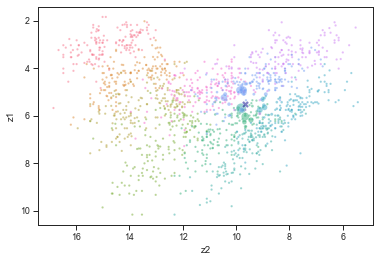

In [11]:
# Get probabilities where N for w = 10
exemplars = exclude(exemplars, thestim,
                    exclude_self = True,
                    alsoexclude='speaker')
exemplars = bias_N(exemplars,
                   cat=cat, catbias=catbias)
bigdf = activation(thestim, exemplars,
                   dimsdict = w4, c = cval)
pr = probs(bigdf, catslist)
pr['vowel']=np.round(pr['vowel'],3)
a = getactiv(activxn = bigdf, x='z2', y = 'z1', cat='vowel')
pl = activplot(a=a, x='z2', y='z1', cat='vowel',
               test=thestim, invert = True)
print(pr)

1
{'type':   type  probability
0    c     0.300413
1    m     0.252053
2    w     0.447534, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.271
3    GOOSE        0.058
4      KIT        0.000
5    NURSE        0.000
6     PALM        0.141
7    STRUT        0.266
8  THOUGHT        0.264
9     TRAP        0.000}
2
{'type':   type  probability
0    c     0.207534
1    m     0.174126
2    w     0.618340, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.293
3    GOOSE        0.040
4      KIT        0.000
5    NURSE        0.000
6     PALM        0.193
7    STRUT        0.199
8  THOUGHT        0.274
9     TRAP        0.000}
5
{'type':   type  probability
0    c     0.107670
1    m     0.090337
2    w     0.801993, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.317
3    GOOSE        0.021
4      KIT        0.000
5    NURSE        0.000

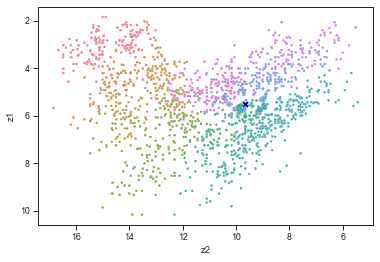

In [12]:
# Try out different numbers of bias towards women
cat = "type"

aclist = [1,2,5,10,25]
for ac in aclist:
    print(ac)
    catbias = {"m":1, "c":1, "w":ac}
    exemplars = exclude(exemplars, thestim, exclude_self = True, alsoexclude='speaker')
    exemplars = bias_N(exemplars, cat=cat, catbias=catbias)
    bigdf = activation(thestim, exemplars, dimsdict = w2, c = cval)
    pr = probs(bigdf, catslist)
    pr['vowel']=np.round(pr['vowel'],3)
    a = getactiv(activxn = bigdf, x='z2', y = 'z1', cat='vowel')
    pl = activplot(a=a, x='z2', y='z1', cat='vowel', test=thestim, invert = True)
    plt.show
    print(pr)

{'type':   type  probability
0    c     0.091912
1    m     0.771163
2    w     0.136925, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.088
3    GOOSE        0.018
4      KIT        0.000
5    NURSE        0.000
6     PALM        0.049
7    STRUT        0.751
8  THOUGHT        0.093
9     TRAP        0.001}


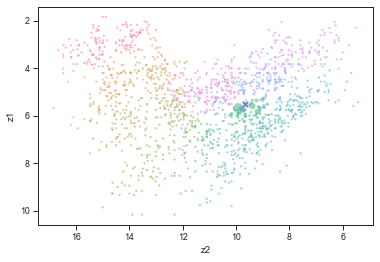

In [13]:
# Bias towards men
cat = "type"
catbias = {"m":10, "c":1, "w":1}
exemplars = exclude(exemplars, thestim,
                    exclude_self = True,
                    alsoexclude='speaker')
exemplars = bias_N(exemplars, cat=cat,
                   catbias=catbias)
bigdf = activation(thestim, exemplars,
                   dimsdict = w2, c = cval)
pr = probs(bigdf, catslist)
pr['vowel']=np.round(pr['vowel'],3)
a = getactiv(activxn = bigdf, x='z2', y = 'z1',
             cat='vowel')
pl = activplot(a=a, x='z2', y='z1', cat='vowel',
               test=thestim, invert = True)
plt.show
print(pr)

{'type':   type  probability
0    c     0.811112
1    m     0.068054
2    w     0.120834, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.355
3    GOOSE        0.156
4      KIT        0.000
5    NURSE        0.000
6     PALM        0.038
7    STRUT        0.072
8  THOUGHT        0.379
9     TRAP        0.000}


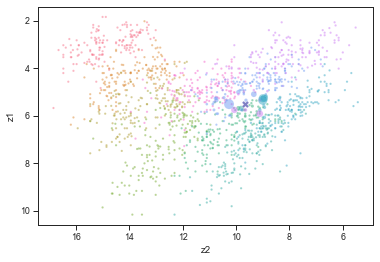

In [14]:
# Bias towards children
cat = "type"
catbias = {"m":1, "c":10, "w":1}
exemplars = exclude(exemplars, thestim,
                    exclude_self = True,
                    alsoexclude='speaker')
exemplars = bias_N(exemplars, cat=cat,
                   catbias=catbias)
bigdf = activation(thestim, exemplars,
                   dimsdict = w2, c = cval)
pr = probs(bigdf, catslist)
pr['vowel']=np.round(pr['vowel'],3)
a = getactiv(activxn = bigdf, x='z2', y = 'z1',
             cat='vowel')
pl = activplot(a=a, x='z2', y='z1', cat='vowel',
               test=thestim, invert = True)
plt.show
print(pr)

{'type':   type  probability
0    c     0.288510
1    m     0.233064
2    w     0.478427, 'vowel':      vowel  probability
0    DRESS        0.000
1   FLEECE        0.000
2     FOOT        0.277
3    GOOSE        0.056
4      KIT        0.000
5    NURSE        0.000
6     PALM        0.150
7    STRUT        0.249
8  THOUGHT        0.268
9     TRAP        0.000}


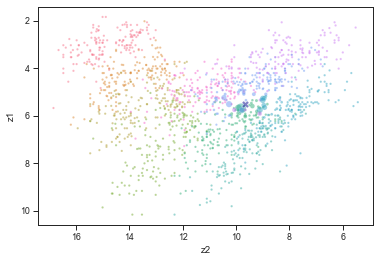

In [15]:
rescat = "type"

exemplars = exclude(exemplars, thestim,
                    exclude_self = True,
                    alsoexclude='speaker')
exemplars = reset_N(exemplars, N=1)
bigdf = activation(thestim, exemplars,
                   dimsdict = w2, c = cval)
pr = probs(bigdf, catslist)

#resonate!!
for n in range(0,1):
    edict = pr[rescat].set_index(rescat).to_dict()['probability']
    exemplars['resterm'] = exemplars[rescat].map(edict) / (n+1)
    exemplars['N'] = exemplars['N'] + exemplars['resterm']
    bigdf = activation(thestim, exemplars, dimsdict = w2, c = cval)
    pr = probs(bigdf, catslist)

pr['vowel']=np.round(pr['vowel'],3)
a = getactiv(activxn = bigdf, x='z2', y = 'z1', cat='vowel')
pl = activplot(a=a, x='z2', y='z1', cat='vowel',
               test=thestim, invert = True)
plt.show
print(pr)